# mass ratio dependence

basically, sometimes we thing $P(q)$ is flat, sometimes we think it is a power law. I want to see how much this actually matters

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from astropy.table import Table
import pickle
import pandas as pd
import SyntheticData as sd
import Sampler
import json

/home/bepennell/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [25]:
mdwarfs = Table.read('./data/200pc_mdwarfs_reduced.fits', format='fits')

In [46]:
data_52 = sd.create_synthetic_data(object_count=250000, catalogue=mdwarfs[::10], binary_fraction=0.3, period_model=(5,2), mass_model=None, ecc_type='circular')

Computing Binaries:   0%|          | 0/75000 [00:00<?, ?it/s]

In [44]:
data = sd.create_synthetic_data(object_count=250000, catalogue=mdwarfs[::10], binary_fraction=0.3, period_model=(4,1.3), mass_model=None, ecc_type='circular')

Computing Binaries:   0%|          | 0/75000 [00:00<?, ?it/s]

In [45]:
data_exp = sd.create_synthetic_data(object_count=250000, catalogue=mdwarfs[::10], binary_fraction=0.3, period_model=(4,1.3), mass_model="exponential", ecc_type='circular')

Computing Binaries:   0%|          | 0/75000 [00:00<?, ?it/s]

In [68]:
outdata = dict()
outdata["meta"] = dict()
outdata["meta"]["metaparams"] = f"{0.3} Binary fraction, {(4,1.3)} T distribution, {0} q index"
outdata["meta"]["notes"] = "2026.01.09 250k samples, circular only, flat in q"
outdata["data"] = data

outfile = open('./massive_data/massive_samples_413.pkl', "wb")
pickle.dump(outdata, outfile)
outfile.close()

outdata = dict()
outdata["meta"] = dict()
outdata["meta"]["metaparams"] = f"{0.3} Binary fraction, {(5,2)} T distribution, {0} q index"
outdata["meta"]["notes"] = "2026.01.09 250k samples, circular only, flat in q"
outdata["data"] = data_52

outfile = open('./massive_data/massive_samples_52.pkl', "wb")
pickle.dump(outdata, outfile)
outfile.close()

outdata = dict()
outdata["meta"] = dict()
outdata["meta"]["metaparams"] = f"{0.3} Binary fraction, {(4,1.3)} T distribution, {0.5} q index"
outdata["meta"]["notes"] = "2026.01.09 250k samples, circular only, exponential q"
outdata["data"] = data_exp

outfile = open('./massive_data/massive_samples_413_qexp.pkl', "wb")
pickle.dump(outdata, outfile)
outfile.close()

In [2]:
data = pickle.load(open("./massive_data/massive_samples_413.pkl", "rb"))["data"]
data_exp = pickle.load(open("./massive_data/massive_samples_413_qexp.pkl", "rb"))["data"]
data_52 = pickle.load(open("./massive_data/massive_samples_52.pkl", "rb"))["data"]

In [70]:
bdata = data[[d["is_binary"] == True for d in data]]
bdata_exp = data_exp[[d["is_binary"] == True for d in data_exp]]

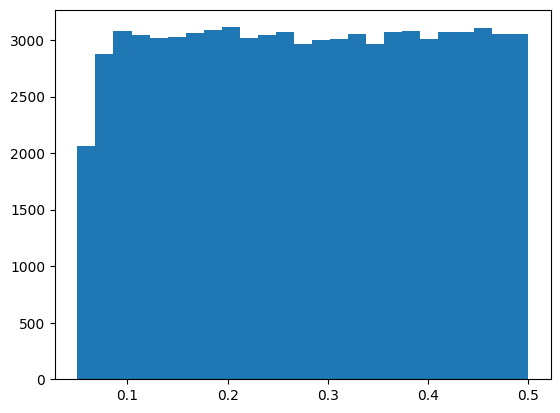

In [71]:
plt.hist([b["q"] for b in bdata], bins=25);

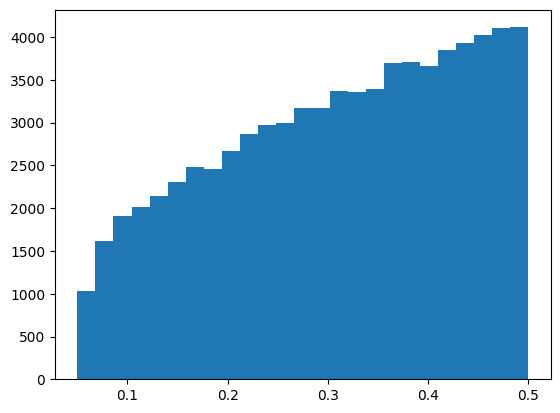

In [49]:
plt.hist([b["q"] for b in bdata_exp], bins=25);

In [50]:
synthdata = data
soltypes = np.zeros(len(synthdata), dtype=np.int8)
for i in range(len(soltypes)):
    soltypes[i] = synthdata[i]["solution_type"] 
    
rates = [len(soltypes[soltypes == soltype])/len(synthdata)*100 for soltype in [0,5,7,9,12]]
grid = [
    rates,
    [int(grp/100*len(synthdata)) for grp in rates]
]
row_labels = ["Rate (%)", "Counts"]
col_labels = ["low RUWE", "high RUWE", "Acceleration", "Jerk", "Full Orbit"]
pd.DataFrame(grid, index=row_labels, columns=col_labels)

,low RUWE,high RUWE,Acceleration,Jerk,Full Orbit
Rate (%),95.5936,3.3672,0.6164,0.1608,0.262
Counts,238983.0000,8418.0000,1541.0000,402.0000,655.000


In [51]:
synthdata = data_exp
soltypes = np.zeros(len(synthdata), dtype=np.int8)
for i in range(len(soltypes)):
    soltypes[i] = synthdata[i]["solution_type"] 
    
rates = [len(soltypes[soltypes == soltype])/len(synthdata)*100 for soltype in [0,5,7,9,12]]
grid = [
    rates,
    [int(grp/100*len(synthdata)) for grp in rates]
]
row_labels = ["Rate (%)", "Counts"]
col_labels = ["low RUWE", "high RUWE", "Acceleration", "Jerk", "Full Orbit"]
pd.DataFrame(grid, index=row_labels, columns=col_labels)

,low RUWE,high RUWE,Acceleration,Jerk,Full Orbit
Rate (%),95.0168,3.8104,0.7044,0.1792,0.2892
Counts,237542.0000,9526.0000,1761.0000,448.0000,723.0000


ok so they really are quite different

In [4]:
sc_cubes_singular = pickle.load(open("./data/2025-12-10-200pc_mdwarf_circular_3plx.pkl", "rb"))

here's proof the method works with many different binary fractions

Reducing catalogue...
Computing grids...


  0%|          | 0/25000 [00:00<?, ?it/s]

Computing likelihoods...


  0%|          | 0/2500 [00:00<?, ?it/s]

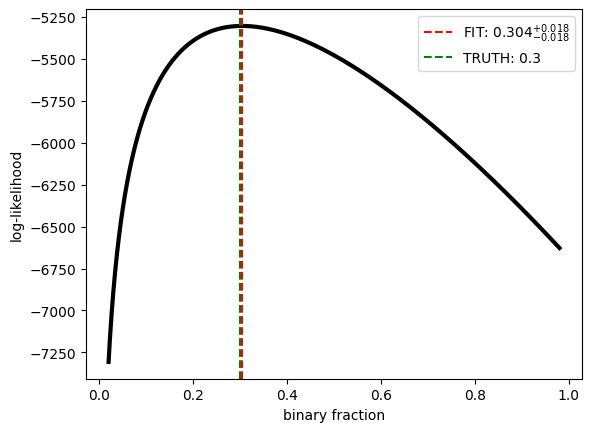

In [8]:
synthdata = data
working_catalogue = []
relevant_list = ["parallax", "mass", "solution_type"]
for row in synthdata[::10]:
    df = dict()
    for item in relevant_list:
        df[item] = float(row[item])
    working_catalogue.append(df)

model_cube = Sampler.create_model_cube((15,15), p_model=(4,1.3))
synthsampler = Sampler.popsampler(sc_cubes_singular, working_catalogue, model_cube=model_cube)
fbs, likelihoods = synthsampler.binarity(resolution=2500, verbose=True)
synthsampler.fb_likelihood(fb=0.3)

Reducing catalogue...
Computing grids...


  0%|          | 0/16392 [00:00<?, ?it/s]

Computing likelihoods...


  0%|          | 0/2500 [00:00<?, ?it/s]

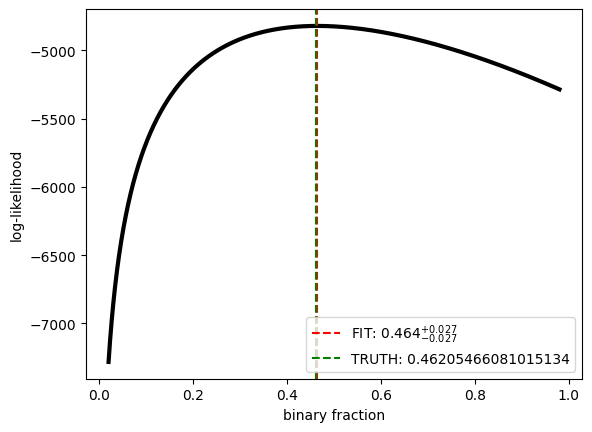

In [ ]:
synthdata = data
working_catalogue = []
relevant_list = ["parallax", "mass", "solution_type"]
singles = 0
for row in synthdata[::10]:
    use_object = True
    if row["is_binary"] == False:
        if np.random.rand() < 0.5: # ignore half the singles, get ~45% binarity
            use_object = False
        else:
            singles += 1
    if use_object:
        df = dict()
        for item in relevant_list:
            df[item] = float(row[item])
        working_catalogue.append(df)

model_cube = Sampler.create_model_cube((15,15), p_model=(4,1.3))
synthsampler = Sampler.popsampler(sc_cubes_singular, working_catalogue, model_cube=model_cube)
fbs, likelihoods = synthsampler.binarity(resolution=2500, verbose=True)
synthsampler.fb_likelihood(fb=1-singles/len(working_catalogue))

Reducing catalogue...
Computing grids...


  0%|          | 0/21178 [00:00<?, ?it/s]

Computing likelihoods...


  0%|          | 0/2500 [00:00<?, ?it/s]

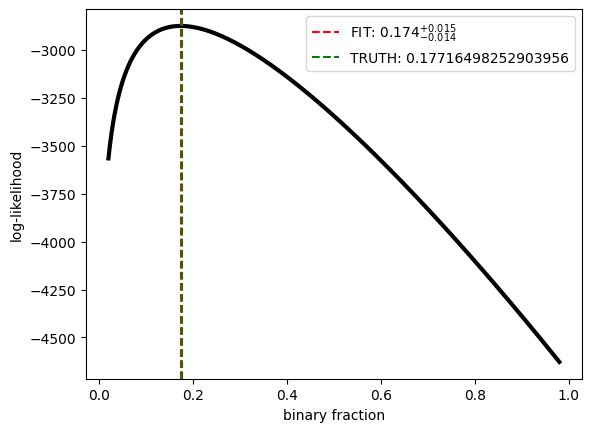

In [63]:
synthdata = data
working_catalogue = []
relevant_list = ["parallax", "mass", "solution_type"]
binaries = 0
for row in synthdata[::10]:
    use_object = True
    if row["is_binary"] == True:
        if np.random.rand() < 0.5: # ignore half the binaries, get ~15% binarity
            use_object = False
        else:
            binaries += 1
    if use_object:
        df = dict()
        for item in relevant_list:
            df[item] = float(row[item])
        working_catalogue.append(df)

model_cube = Sampler.create_model_cube((15,15), p_model=(4,1.3))
synthsampler = Sampler.popsampler(sc_cubes_singular, working_catalogue, model_cube=model_cube)
fbs, likelihoods = synthsampler.binarity(resolution=2500, verbose=True)
synthsampler.fb_likelihood(fb=binaries/len(working_catalogue))

and now on the exponential one... it is different!

Reducing catalogue...
Computing grids...


  0%|          | 0/125000 [00:00<?, ?it/s]

Computing likelihoods...


  0%|          | 0/2500 [00:00<?, ?it/s]

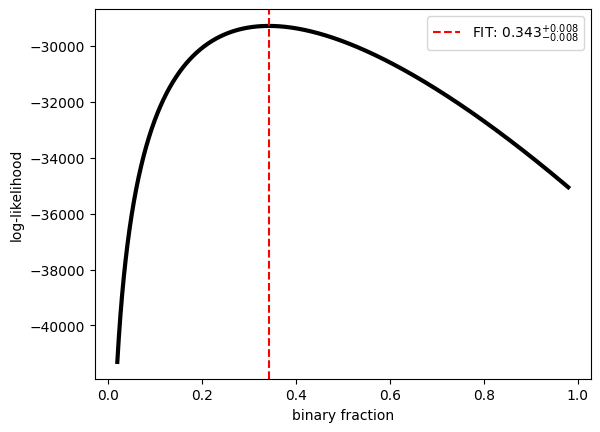

In [65]:
synthdata = data_exp
working_catalogue = []
relevant_list = ["parallax", "mass", "solution_type"]
for row in synthdata[::2]:
    df = dict()
    for item in relevant_list:
        df[item] = float(row[item])
    working_catalogue.append(df)

model_cube = Sampler.create_model_cube((15,15), p_model=(4,1.3))
synthsampler = Sampler.popsampler(sc_cubes_singular, working_catalogue, model_cube=model_cube)
fbs, likelihoods = synthsampler.binarity(resolution=2500, verbose=True)
synthsampler.fb_likelihood()

mass ratio dependence matters! at least, a bit, here it came to 5%.

## comparison

Here, take the two different datasets and run each of them with the wrong and right mass ratio model

Reducing catalogue...
Computing grids...


  0%|          | 0/25000 [00:00<?, ?it/s]

Computing likelihoods...


  0%|          | 0/2500 [00:00<?, ?it/s]

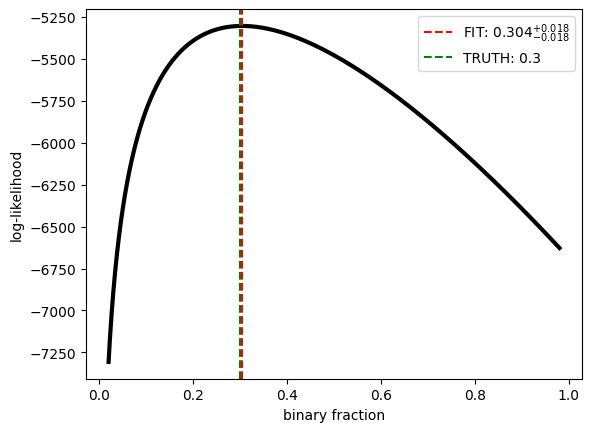

Reducing catalogue...
Computing grids...


  0%|          | 0/25000 [00:00<?, ?it/s]

Computing likelihoods...


  0%|          | 0/2500 [00:00<?, ?it/s]

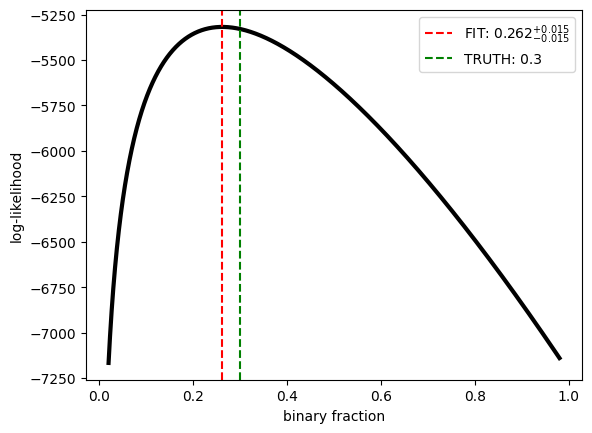

Reducing catalogue...
Computing grids...


  0%|          | 0/25000 [00:00<?, ?it/s]

Computing likelihoods...


  0%|          | 0/2500 [00:00<?, ?it/s]

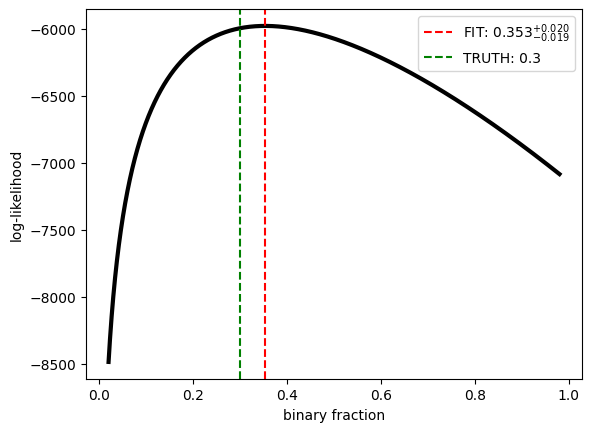

Reducing catalogue...
Computing grids...


  0%|          | 0/25000 [00:00<?, ?it/s]

Computing likelihoods...


  0%|          | 0/2500 [00:00<?, ?it/s]

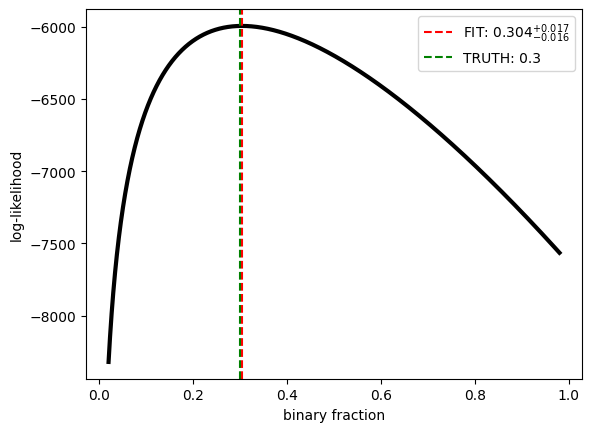

In [5]:
### FLATQ DATA ###
synthdata = data
working_catalogue = []
relevant_list = ["parallax", "mass", "solution_type"]
for row in synthdata[::10]:
    df = dict()
    for item in relevant_list:
        df[item] = float(row[item])
    working_catalogue.append(df)

# USE FLATQ MODEL
model_cube = Sampler.create_model_cube((15,15), p_model=(4,1.3))
synthsampler = Sampler.popsampler(sc_cubes_singular, working_catalogue, model_cube=model_cube)
synthsampler.binarity(resolution=2500, verbose=True)
synthsampler.fb_likelihood(fb=0.3)
res_fdata_fmodel = synthsampler.fb_estimator()

# USE QEXP MODEL
model_cube = Sampler.create_model_cube((15,15), p_model=(4,1.3), q_model=0.5)
synthsampler = Sampler.popsampler(sc_cubes_singular, working_catalogue, model_cube=model_cube)
synthsampler.binarity(resolution=2500, verbose=True)
synthsampler.fb_likelihood(fb=0.3)
res_fdata_qmodel = synthsampler.fb_estimator()

### QEXP DATA ###
synthdata = data_exp
working_catalogue = []
relevant_list = ["parallax", "mass", "solution_type"]
for row in synthdata[::10]:
    df = dict()
    for item in relevant_list:
        df[item] = float(row[item])
    working_catalogue.append(df)

# USE FLATQ MODEL
model_cube = Sampler.create_model_cube((15,15), p_model=(4,1.3))
synthsampler = Sampler.popsampler(sc_cubes_singular, working_catalogue, model_cube=model_cube)
synthsampler.binarity(resolution=2500, verbose=True)
synthsampler.fb_likelihood(fb=0.3)
res_qdata_fmodel = synthsampler.fb_estimator()

# USE QEXP MODEL
model_cube = Sampler.create_model_cube((15,15), p_model=(4,1.3), q_model=0.5)
synthsampler = Sampler.popsampler(sc_cubes_singular, working_catalogue, model_cube=model_cube)
synthsampler.binarity(resolution=2500, verbose=True)
synthsampler.fb_likelihood(fb=0.3)
res_qdata_qmodel = synthsampler.fb_estimator()